In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_theme(style="whitegrid", palette="Set2")
sns.set_context("paper")
plt.rcParams['savefig.dpi'] = 300

CSV_PATH = Path("data", "wandb_bert_cased_uncased.csv")

In [3]:
df = pd.read_csv(CSV_PATH)
df

,Name,dummy,transformer_model,test_score
0,glowing-sweep-40,19,bert-base-cased,0.519743
1,scarlet-sweep-39,19,bert-base-uncased,0.581075
2,zesty-sweep-38,18,bert-base-cased,0.530511
3,wild-sweep-37,18,bert-base-uncased,0.552913
4,copper-sweep-36,17,bert-base-cased,0.504269
5,rich-sweep-35,17,bert-base-uncased,0.396059
6,easy-sweep-34,16,bert-base-cased,0.492205
7,frosty-sweep-33,16,bert-base-uncased,0.576028
8,hopeful-sweep-32,15,bert-base-cased,0.604675
9,worthy-sweep-31,15,bert-base-uncased,0.587341


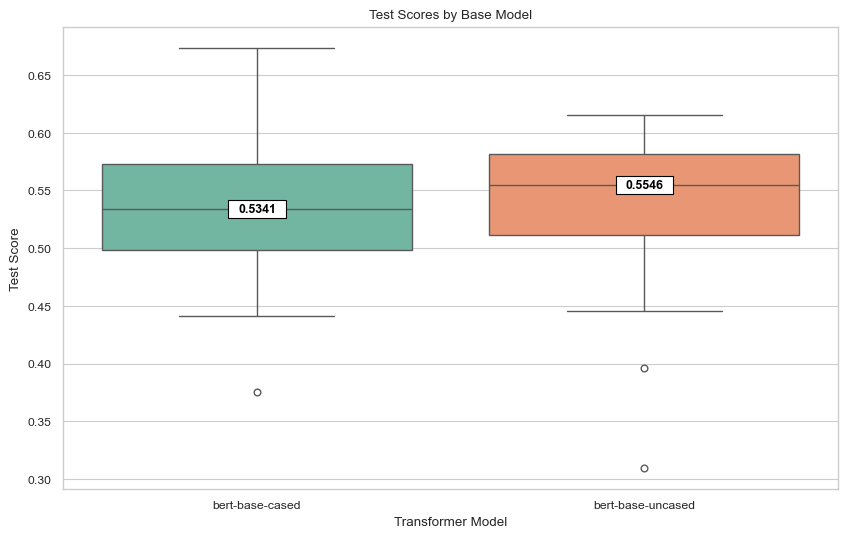

In [8]:
X_SIZE = 10
Y_SIZE = 6

plt.figure(figsize=(X_SIZE, Y_SIZE))

box_plot = sns.boxplot(x='transformer_model', y='test_score', data=df, hue='transformer_model')

plt.title('Test Scores by Base Model')
plt.xlabel('Transformer Model')
plt.ylabel('Test Score')

medians = df.groupby(['transformer_model'])['test_score'].median()

# Get the current axis
ax = plt.gca()

# Calculate the vertical offset based on the plot size
y_range = ax.get_ylim()[1] - ax.get_ylim()[0]
vertical_offset = y_range * 0.01 

x_margin = X_SIZE = 0.025
y_margin = Y_SIZE = 0.0025

for xtick in box_plot.get_xticks():
    median = medians.iloc[xtick]
    text = ax.text(
        xtick, 
        median,
        f'{median:.4f}', 
        horizontalalignment='center',
        verticalalignment='center',
        size=9,
        color='black',
        weight='semibold'
    )
    
    # Get the bounding box of the text
    bbox = text.get_window_extent(renderer=plt.gcf().canvas.get_renderer())
    
    # Convert bbox to data coordinates
    bbox_data = bbox.transformed(ax.transData.inverted())
    
    rect = plt.Rectangle((bbox_data.x0 - x_margin, bbox_data.y0 - y_margin), 
                         bbox_data.width + 2*x_margin, 
                         bbox_data.height + 2*y_margin, 
                         facecolor='white', 
                         edgecolor='black', 
                         # alpha=0.7, 
                         zorder=3)
    
    ax.add_patch(rect)
    
    # Bring the text to the front
    text.set_zorder(4)

save_path = Path(os.getcwd(), "output_figs", "cased_uncased_fig.png")
plt.savefig(save_path, bbox_inches='tight')
plt.show()

In [11]:
stats = df.groupby('transformer_model')['test_score'].agg(['max', 'min', 'median', 'mean', 'std'])
stats['mean_std'] = stats['mean'].round(4).astype(str) + ' ± ' + stats['std'].round(4).astype(str)
stats = stats.loc[:, ["max", "min", 'median', 'mean_std']]
stats.columns = ['Highest', "Lowest", 'Median', 'Mean ± STD']
stats = stats.round(4)
stats

,Highest,Lowest,Median,Mean ± STD
transformer_model,,,,
bert-base-cased,0.6735,0.3749,0.5341,0.5334 ± 0.0682
bert-base-uncased,0.6154,0.3096,0.5546,0.5307 ± 0.0757


In [12]:
print(stats.style.format(precision=4).to_latex())

\begin{tabular}{lrrrl}
 & Highest & Lowest & Median & Mean ± STD \\
transformer_model &  &  &  &  \\
bert-base-cased & 0.6735 & 0.3749 & 0.5341 & 0.5334 ± 0.0682 \\
bert-base-uncased & 0.6154 & 0.3096 & 0.5546 & 0.5307 ± 0.0757 \\
\end{tabular}



In [13]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')

def highlight_second_max(s, props=''):
    return np.where(s == np.sort(s.values)[-2], props, '')

styled_stats = stats.style.format(precision=4)
styled_stats = styled_stats.apply(highlight_max, props="textbf:--rwrap;", subset=stats.columns[0:-1], axis=0)
styled_stats = styled_stats.apply(highlight_second_max, props="ul:--rwrap;", subset=stats.columns[0:-1], axis=0)
print(styled_stats.to_latex())

\begin{tabular}{lrrrl}
 & Highest & Lowest & Median & Mean ± STD \\
transformer_model &  &  &  &  \\
bert-base-cased & \textbf{0.6735} & \textbf{0.3749} & \ul{0.5341} & 0.5334 ± 0.0682 \\
bert-base-uncased & \ul{0.6154} & \ul{0.3096} & \textbf{0.5546} & 0.5307 ± 0.0757 \\
\end{tabular}

